In [33]:
import utils
from torchdyn.core import NeuralODE
import pytorch_lightning as pl
import torch
import torch.nn as nn
import psd
from importlib import reload

utils = reload(utils)

In [2]:
device = torch.device("cuda:0")
torch.set_default_dtype(torch.float64)
torch.set_float32_matmul_precision("high")

In [3]:
def get_model_l63():
    layers = [
        nn.Linear(3, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 3),
    ]
    f = nn.Sequential(*layers)
    model = NeuralODE(f, sensitivity="adjoint")
    return model

In [4]:
model = utils.Learner(
    model=get_model_l63(),
    t_span=torch.linspace(0, 1, 2),
    lr=1e-2,
    loader=utils.get_loader_l63(),
)
trainer = pl.Trainer(max_epochs=100, accelerator="gpu", devices="auto")
trainer.fit(model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/anuramat/.local/share/ghq/github.com/anuramat/uhd-mldyn/final/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Your vector field callable (nn.Module) should have both time `t` and state `x` as arguments, we've wrapped it for you.
raw data shape -- torch.Size([100000, 3])
shifted tensors shape -- x: torch.Size([99999, 3]), y: torch.Size([99999, 3])



  | Name  | Type      | Params | Mode 
--------------------------------------------
0 | model | NeuralODE | 66.9 K | train
--------------------------------------------
66.9 K    Trainable params
0         Non-trainable params
66.9 K    Total params
0.268     Total estimated model params size (MB)
16        Modules in train mode
0         Modules in eval mode
/home/anuramat/.local/share/ghq/github.com/anuramat/uhd-mldyn/final/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/home/anuramat/.local/share/ghq/github.com/anuramat/uhd-mldyn/final/venv/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_ev

Training: |                                                                                                   …

loss: 0.012519283100858666, lr: 0.01
loss: 0.02537705895615058, lr: 0.01
loss: 0.010170950065379814, lr: 0.01
loss: 0.00993689254412811, lr: 0.01
loss: 0.009951553990105567, lr: 0.01
loss: 0.009247628405438092, lr: 0.01
loss: 0.008320551502092387, lr: 0.01
loss: 0.0071445373870369575, lr: 0.01
loss: 0.006426309485517086, lr: 0.01
loss: 0.00795608742073386, lr: 0.01
loss: 0.008199579167183285, lr: 0.01
loss: 0.006663219437960281, lr: 0.01
loss: 0.006383206316061425, lr: 0.01
loss: 0.006037518557387137, lr: 0.01
loss: 0.006333050111761995, lr: 0.01
loss: 0.0064857253551403055, lr: 0.01
loss: 0.006304225155012868, lr: 0.01
loss: 0.006030660384273158, lr: 0.01
loss: 0.00586381991084184, lr: 0.01
loss: 0.005801277410073991, lr: 0.01
loss: 0.005643744863753508, lr: 0.01
loss: 0.005547104471881323, lr: 0.01
loss: 0.005532359128385682, lr: 0.01
loss: 0.005580649438227997, lr: 0.01
loss: 0.005564481428327316, lr: 0.01
loss: 0.005445572341764655, lr: 0.01
loss: 0.0053969160438732365, lr: 0.01
lo

`Trainer.fit` stopped: `max_epochs=100` reached.


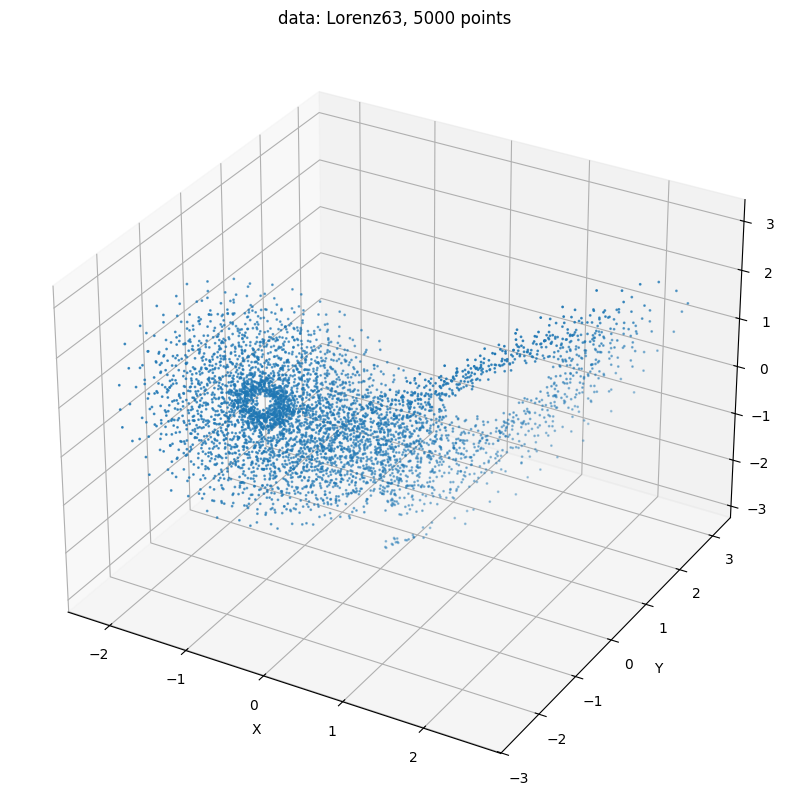

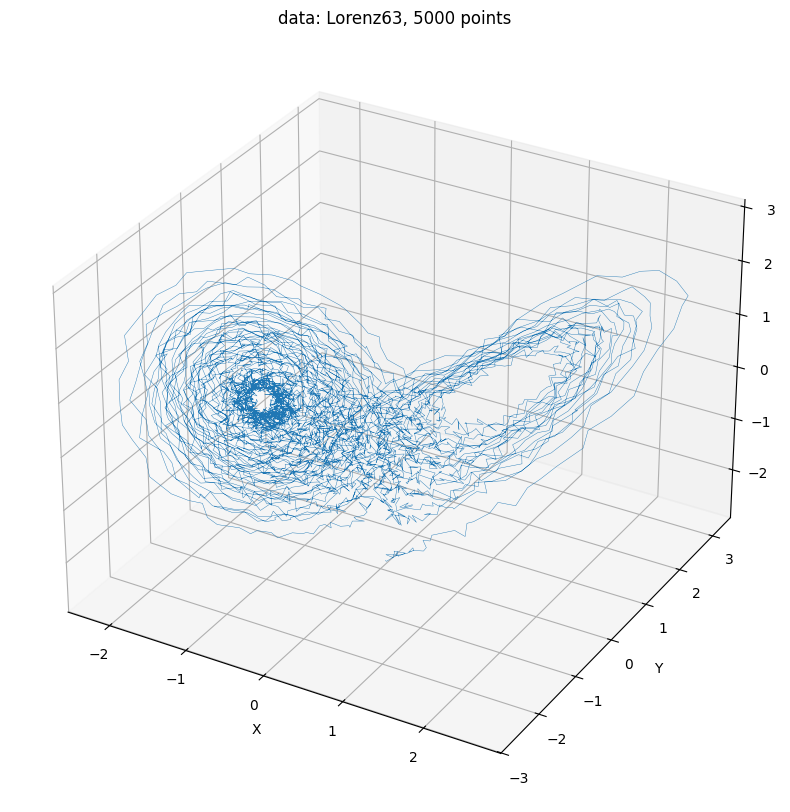

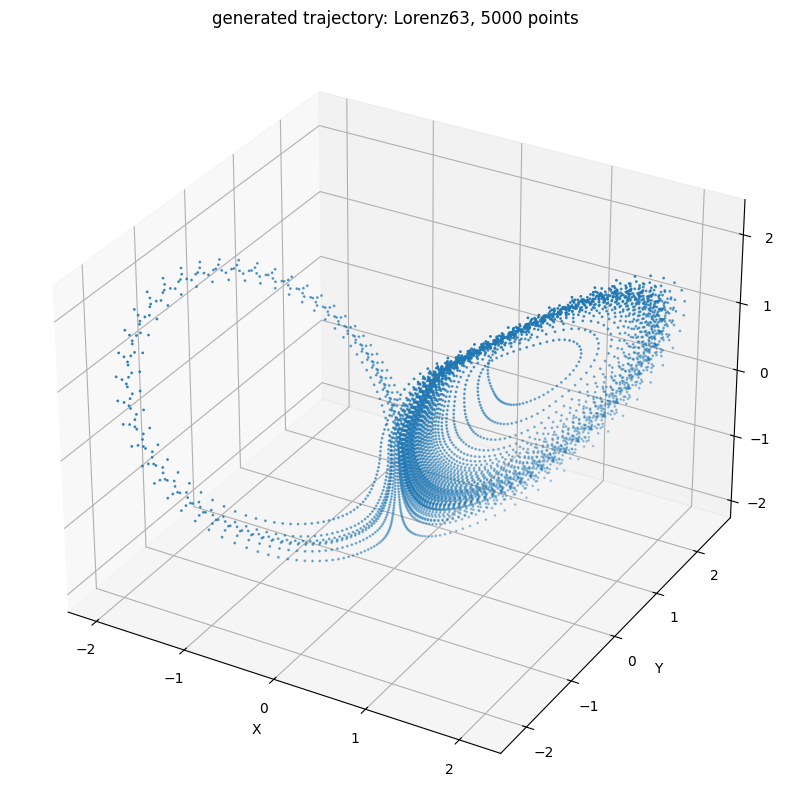

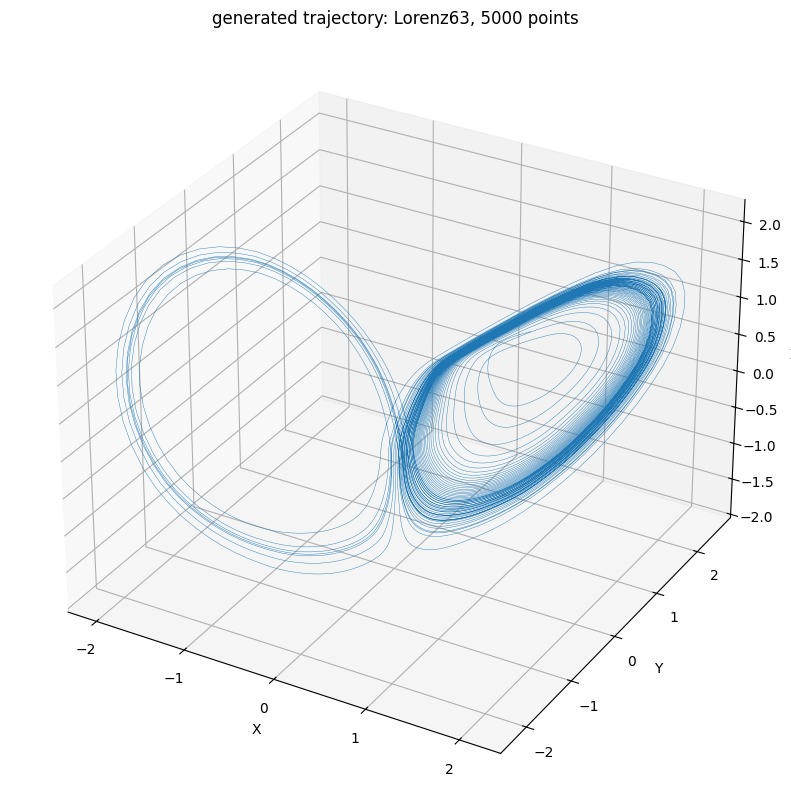

In [34]:
n_timesteps = 5000
preds = utils.make_trajectory(model, [1, 1, 1], n_timesteps=n_timesteps)
real = utils.get_data_l63()[0][:n_timesteps, :]
utils.plot_l63(real, title="data", style="scatter")
utils.plot_l63(real, title="data", style="line")
utils.plot_l63(preds, title="generated trajectory", style="scatter")
utils.plot_l63(preds, title="generated trajectory", style="line")

In [35]:
print(psd.power_spectrum_error(preds, real))

IndexError: tuple index out of range